# Load in file before and after beershebashire

In [1]:
import sys,os,os.path
sys.path.append("../../")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

#%load_ext autoreload
#%autoreload 2
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 23

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import invisible_cities.core.core_functions                   as     coref
import invisible_cities.io.dst_io                           as     dstio

from invisible_cities.cities.beersheba                 import cut_over_Q, drop_isolated, deconvolve_signal


from invisible_cities.database.load_db       import DataSiPM

from invisible_cities.evm.event_model        import Cluster, Hit
from invisible_cities.types.ic_types         import xy
from invisible_cities.reco.paolina_functions import voxelize_hits

from invisible_cities.evm.event_model        import HitEnergy
from invisible_cities.cities.beersheba          import DeconvolutionMode
from invisible_cities.cities.beersheba          import CutType


from invisible_cities.reco.deconv_functions import deconvolve
from invisible_cities.reco.deconv_functions import deconvolution_input
from invisible_cities.reco.deconv_functions import InterpolationMethod

import invisible_cities.io.mcinfo_io as mcio


import matplotlib.cm as cm
from matplotlib.colors import Normalize

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# load in the untouched file
in_path = '/home/e78368jw/Documents/NEXT_CODE/next_misc/beersheba_work/data/shire_test/in_files/'
files = [f for f in os.listdir(in_path) if f.endswith('.h5')]
pre_shire = dstio.load_dst(f'{in_path}{files[0]}', 'DECO', 'Events')
display(pre_shire)

,event,npeak,X,Y,Z,E,Xpeak,Ypeak,time,nsipm,Xrms,Yrms
0,820,21.0,-251.125,276.575,901.554375,0.000035,-104.543570,137.072686,1.751990e+09,0,0,0
1,820,21.0,-251.125,277.575,901.554375,0.000034,-104.543570,137.072686,1.751990e+09,0,0,0
2,820,21.0,-250.125,275.575,901.554375,0.000033,-104.543570,137.072686,1.751990e+09,0,0,0
3,820,21.0,-250.125,276.575,901.554375,0.000041,-104.543570,137.072686,1.751990e+09,0,0,0
4,820,21.0,-250.125,277.575,901.554375,0.000040,-104.543570,137.072686,1.751990e+09,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139281,1303,40.0,67.875,-137.425,1495.790750,0.000009,25.663403,-51.020662,1.751990e+09,0,0,0
139282,1303,40.0,67.875,-136.425,1495.790750,0.000009,25.663403,-51.020662,1.751990e+09,0,0,0
139283,1303,40.0,67.875,-135.425,1495.790750,0.000009,25.663403,-51.020662,1.751990e+09,0,0,0
139284,1303,40.0,67.875,-134.425,1495.790750,0.000008,25.663403,-51.020662,1.751990e+09,0,0,0


In [14]:
def plot_hits(hits, bins = None):
    # then applying transformations to convert to 'SiPM outputs'
    pitch = 15.55
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    if bins is None:
        print('No binning provided, extracting from hits')
        xx = np.arange(hits.X.min(), hits.X.max() + pitch, pitch)
        yy = np.arange(hits.Y.min(), hits.Y.max() + pitch, pitch)
        zz = np.sort(hits.Z.unique())
    else:
        xx = bins[0]
        yy = bins[1]
        zz = bins[2]
    # set weights to be either hits.Q or hits.E based on what the df has 
    if 'Q' in hits:
        weight = hits.Q
    else:
        weight = hits.E
    axes[0].hist2d(hits.X, hits.Y, bins=[xx, yy], weights=weight, cmin=0.0000000001);
    axes[0].set_xlabel('X (mm)');
    axes[0].set_ylabel('Y (mm)');

    axes[1].hist2d(hits.X, hits.Z, bins=[xx, zz], weights=weight, cmin=0.0000000001);
    axes[1].set_xlabel('X (mm)');
    axes[1].set_ylabel('Z (mm)');


    axes[2].hist2d(hits.Y, hits.Z, bins=[yy, zz], weights=weight, cmin=0.0000000001);
    axes[2].set_xlabel('Y (mm)');
    axes[2].set_ylabel('Z (mm)');

    fig.suptitle('Sensors Signal', fontsize=30)

No binning provided, extracting from hits


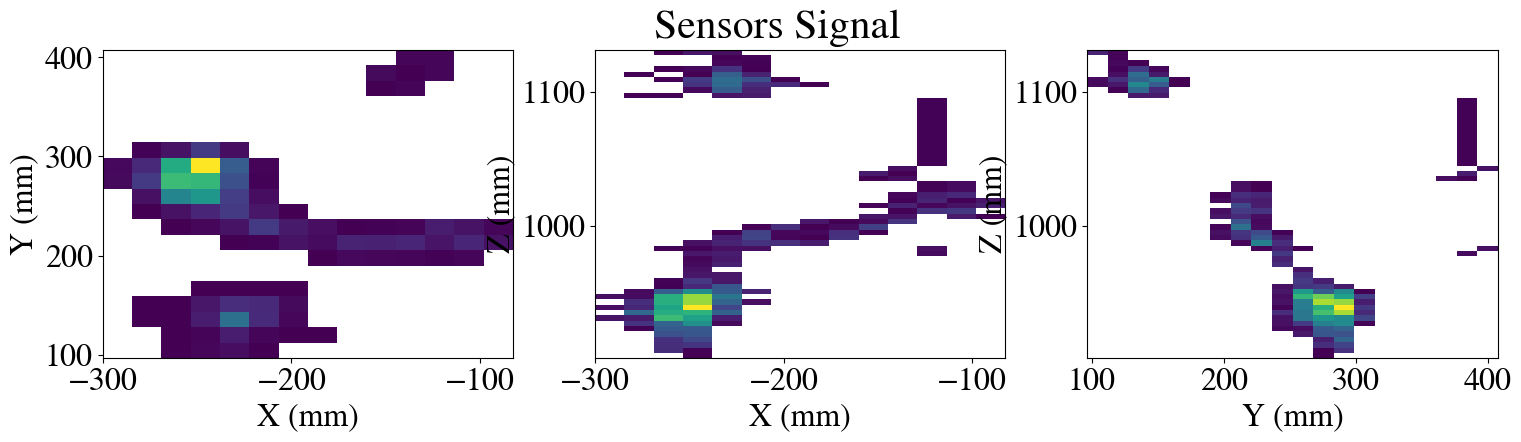

In [4]:
plot_hits(pre_shire[pre_shire.event == pre_shire.event.unique()[0]])

# run beershebashire

In [16]:
!python3 /home/e78368jw/Documents/NEXT_CODE/next_misc/beersheba_work/beershebashire.py /home/e78368jw/Documents/NEXT_CODE/next_misc/beersheba_work/data/shire_test/in_files/ /home/e78368jw/Documents/NEXT_CODE/next_misc/beersheba_work/data/shire_test/out_files/ 15589 230725 --nhits=50 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
input_directory: /home/e78368jw/Documents/NEXT_CODE/next_misc/beersheba_work/data/shire_test/in_files/
output_directory: /home/e78368jw/Documents/NEXT_CODE/next_misc/beersheba_work/data/shire_test/out_files/
run_number: 15589
timestamp: 230725
rebin_d: [5, 5, 4]
drop_dist: [16, 16, 4]
nhits: 50
  0%|                                                     | 0/4 [00:00<?, ?it/s]====================
event 820:
rebinning with 5, 5, 4
rebinned from (29108, 12) to (1662, 12)
dropping...

 25%|███████████▎                                 | 1/4 [00:00<00:01,  2.25it/s]====================
event 855:
rebinning with 5, 5, 4
rebinned from (29480, 12) to (1588, 12)
dropping...

 50%|██████████████████████▌                      | 2/4 [00:00<00:00,  2.09it/s]====================
event 925:
rebinning with 5, 5, 4
rebi

In [17]:
# select the events post beershebashire
# # load in the untouched file
out_path = '/home/e78368jw/Documents/NEXT_CODE/next_misc/beersheba_work/data/shire_test/out_files/'
files = [f for f in os.listdir(out_path) if f.endswith('.h5')]
post_shire = dstio.load_dst(f'{out_path}{files[0]}', 'DECO', 'Events')
display(post_shire)

,event,npeak,X,Y,Z,E,Xpeak,Ypeak,time,Xrms,Yrms,nsipm
0,820,21.0,-297.625,279.075,927.554375,0.000573,0.0,0.0,1.751990e+09,0.0,0.0,1
1,820,21.0,-297.625,279.075,943.554375,0.000069,0.0,0.0,1.751990e+09,0.0,0.0,1
2,820,21.0,-297.625,284.075,927.554375,0.000578,0.0,0.0,1.751990e+09,0.0,0.0,1
3,820,21.0,-297.625,284.075,943.554375,0.000071,0.0,0.0,1.751990e+09,0.0,0.0,1
4,820,21.0,-292.625,279.075,927.554375,0.000836,0.0,0.0,1.751990e+09,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7364,1303,2.0,480.375,0.075,180.814547,0.000014,0.0,0.0,1.751990e+09,0.0,0.0,1
7365,1303,2.0,480.375,5.075,172.814547,0.000475,0.0,0.0,1.751990e+09,0.0,0.0,1
7366,1303,2.0,480.375,5.075,180.814547,0.000002,0.0,0.0,1.751990e+09,0.0,0.0,1
7367,1303,2.0,480.375,10.075,172.814547,0.000515,0.0,0.0,1.751990e+09,0.0,0.0,1


No binning provided, extracting from hits


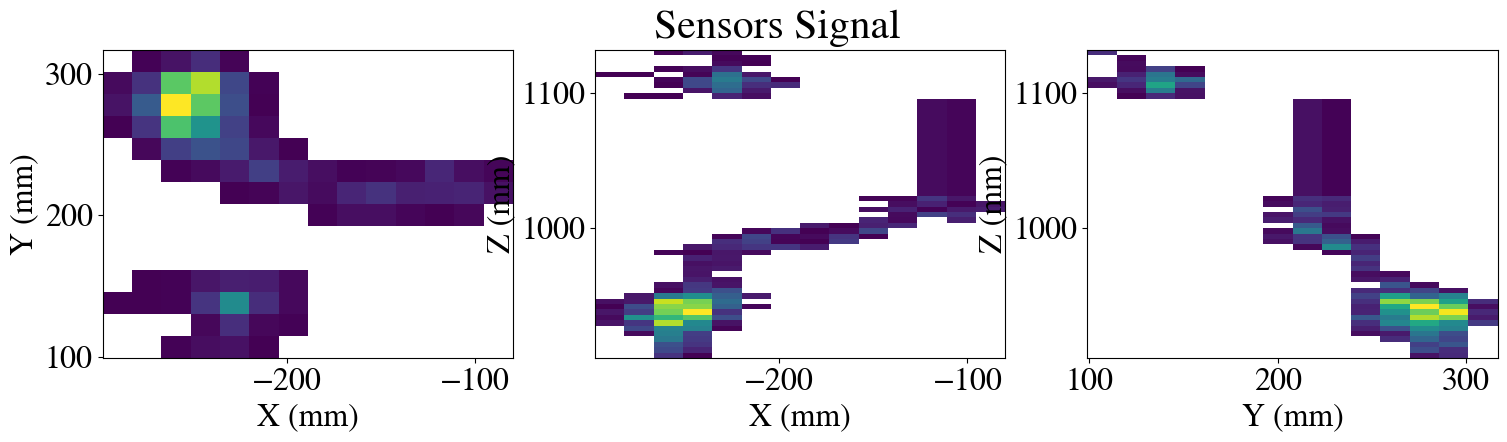

In [18]:
plot_hits(post_shire[post_shire.event == post_shire.event.unique()[0]])